In [ ]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [6]:
data = pd.read_csv("train.csv")

In [7]:
data.head(10)

,id,text,label
0,26418.0,Gerçekten sizin hikayelerinizi izleyerek mi ye...,0
1,14473.0,@USER Çoook çok bi baklava bi sen zaten,0
2,16107.0,"1) Sn. DÜKEL; Atatürk'ün, Karma E. M. ile başl...",0
3,45908.0,Konfederasyonumuzun Aile ve Sosyal Politikalar...,0
4,12878.0,Hakemler tarih yazıyorlar / 9 kişiye karşı 3-2...,1
5,22887.0,@USER @USER @USER @USER @USER @USER @USER @USE...,0
6,42028.0,#KYKYurtZammınaHayır Öğrenci sizin gelir kayna...,0
7,34514.0,@USER @USER Sabırlı ol. Soruşturma devam ediyo...,0
8,21684.0,Toprağın üstünde Aziz ettin .! Toprağın altı...,0
9,37783.0,"Rüyalarımda mevzu her ne olursa olsun, asla so...",0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42398 entries, 0 to 42397
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      27993 non-null  float64
 1   text    42398 non-null  object 
 2   label   42398 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 993.8+ KB


In [9]:
data.nunique()

id       27993
text     42398
label        2
dtype: int64

In [10]:
data.isnull().sum()

id       14405
text         0
label        0
dtype: int64

In [11]:
(data.isnull().sum()/(len(data)))*100


id       33.975659
text      0.000000
label     0.000000
dtype: float64

In [12]:
data = data.drop(['id'], axis = 1)

In [13]:
data.head()

,text,label
0,Gerçekten sizin hikayelerinizi izleyerek mi ye...,0
1,@USER Çoook çok bi baklava bi sen zaten,0
2,"1) Sn. DÜKEL; Atatürk'ün, Karma E. M. ile başl...",0
3,Konfederasyonumuzun Aile ve Sosyal Politikalar...,0
4,Hakemler tarih yazıyorlar / 9 kişiye karşı 3-2...,1


In [14]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
text,42398,42398,Bi airdrop sapığı eksikti aq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
label,42398.0,NaN,NaN,NaN,0.467215,0.49893,0.0,0.0,0.0,1.0,1.0


In [15]:
data.tail()

,text,label
42393,Takım otobüsüne saldırmak nedir ulan şerefini ...,1
42394,@nightmareess_ Aynı bu şekldiyedim ya başlica...,1
42395,@prodbyjaysou @kkesbekes ya kaybol twitimden k...,1
42396,@82_6363AB Ben hdpliyim ve vermeyecem ama akp ...,1
42397,Bi airdrop sapığı eksikti aq,1


In [16]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=nm.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)


Categorical Variables:
Index(['text'], dtype='object')
Numerical Variables:
['label']


<Axes: xlabel='label', ylabel='count'>

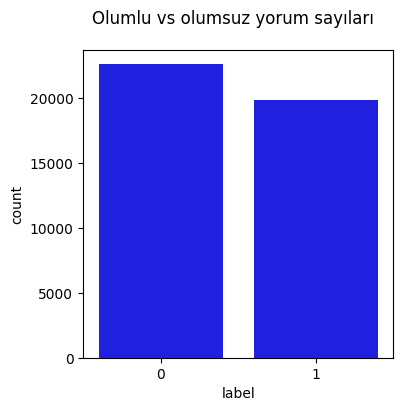

In [17]:
fig, ax = plt.subplots(figsize=(4, 4))
fig.suptitle('Olumlu vs olumsuz yorum sayıları')
sns.countplot(ax=ax, x='label', data=data, color='blue', order=data['label'].value_counts().index)


In [18]:
# 'message' sütunundaki her bir metnin kelime sayısını hesapla
message_lengths = data['text'].astype(str).apply(lambda x: len(x.split()))

# Ortalama kelime uzunluğunu hesapla
average_length = message_lengths.mean()

print(f"Metinlerde Ortalama cümle uzunluğu: {average_length:.2f}")


Metinlerde Ortalama cümle uzunluğu: 16.35


In [2]:
import pandas as pd
import string
import emoji
from nltk.corpus import stopwords
import nltk
import re

stop_words_tr = set(stopwords.words('turkish'))


def clean_text(text):
    text = text.lower()
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    text = emoji.replace_emoji(text, replace='')  # Emojileri kaldır
    
    text = re.sub(r'\d+', '', text)
    
    text = ' '.join([word for word in text.split() if word not in stop_words_tr])
    
    return text

data['cleanText'] = data['text'].apply(clean_text)

cleanData = data[['cleanText', 'label']]

cleanData.to_csv('cleanData.csv', index=False)

print("Veri temizlendi ve cleanData.csv olarak kaydedildi.")


NameError: name 'data' is not defined

In [20]:
data = pd.read_csv("cleanData.csv")
data.head()


,cleanText,label
0,gerçekten sizin hikayelerinizi izleyerek mi ye...,0
1,user çoook bi baklava bi sen zaten,0
2,sn dükel atatürkün karma e m başlattığı siyasi...,0
3,konfederasyonumuzun aile sosyal politikalar ba...,0
4,hakemler tarih yazıyorlar kişiye karşı önde ol...,1


In [21]:
#import pandas as pd
#import stanza

#nlp = stanza.Pipeline(lang='tr', processors='tokenize,mwt,pos,lemma')

# Lemmatization fonksiyonu
#def lemmatize_text(text):
   # doc = nlp(text)
    #lemmatized_text = ' '.join(
      #  [word.lemma if word.lemma is not None else word.text for sentence in doc.sentences for word in sentence.words]
    #)
    #return lemmatized_text

# Lemmatization uygulama
#data['lemmatized_text'] = data['text'].apply(lemmatize_text)

#data.to_csv("train_lemmatized.csv", index=False)

#print("Lemmatization işlemi tamamlandı ve train_lemmatized.csv dosyasına kaydedildi")



In [22]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\Halid Buğra
[nltk_data]     Gökdeniz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Halid Buğra
[nltk_data]     Gökdeniz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [23]:
import pandas as pd
from zeyrek import MorphAnalyzer

# MorphAnalyzer'ı başlat
analyzer = MorphAnalyzer()

def lemmatize_text(text):
    lemmatized_words = []
    for word in text.split():
        analysis = analyzer.analyze(word)
        if analysis:
            lemmatized_word = analysis[0].root  # root'a erişim
            lemmatized_words.append(lemmatized_word)
        else:
            lemmatized_words.append(word)
    return ' '.join(lemmatized_words)

def main():
    data = pd.read_csv("cleanData.csv")

    data = data[data['cleanText'].notna()]
    data = data[data['cleanText'].str.strip() != '']

    data = data.iloc[:40000]

    data['lemmatized_text'] = data['cleanText'].apply(lemmatize_text)

    # Lemmatized veriyi kaydet
    data.to_csv("train_lemmatized.csv", index=False)
    print("Lemmatization işlemi tamamlandı. Yeni dosya: train_lemmatized.csv")

if __name__ == "__main__":
    main()


APPENDING RESULT: <(gerçekten_Adv)(-)(gerçekten:advRoot_ST)>
APPENDING RESULT: <(gerçek_Noun)(-)(gerçek:noun_S + a3sg_S + pnon_S + ten:abl_ST)>
APPENDING RESULT: <(Gerçek_Noun_Prop)(-)(gerçek:nounProper_S + a3sg_S + pnon_S + ten:abl_ST)>
APPENDING RESULT: <(gerçek_Adj)(-)(gerçek:adjectiveRoot_ST + adjZeroDeriv_S + noun_S + a3sg_S + pnon_S + ten:abl_ST)>


AttributeError: 'list' object has no attribute 'root'